In [3]:
!pip3 install pandas --quiet

In [4]:
import pandas as pd
import numpy as np

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   traffic  393 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


<Axes: >

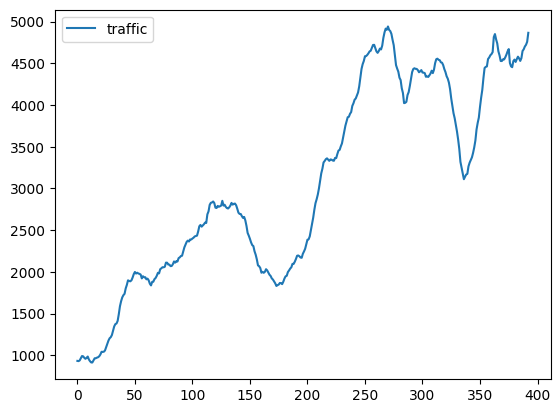

In [8]:
df = pd.read_csv('website_data.csv')

df.info()

df.plot()

In [9]:
df.head()

,traffic
0,932
1,929
2,938
3,964
4,990


<Axes: >

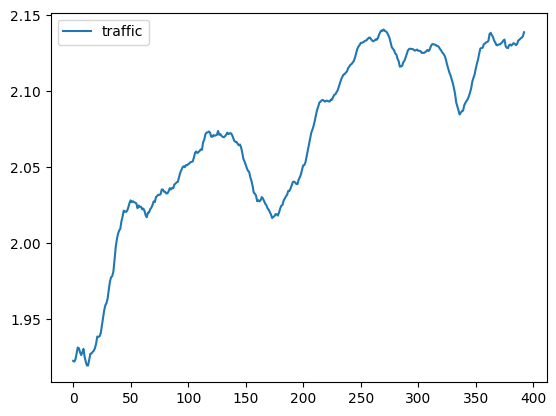

In [11]:
# transform series to stabalize variance
df = np.log(df)

df.plot()

In [12]:
# leave out the last 30 for testing
msk = (df.index < len(df) - 30)
df_train = df[msk]
df_test = df[~msk]

In [13]:
# Step 1: Check for stationary of time series

# Method 1: Check time series plot

# Method 2: ACF plot and PACF plot

# Method 3: ADF test

In [14]:
!pip3 install statsmodels --quiet

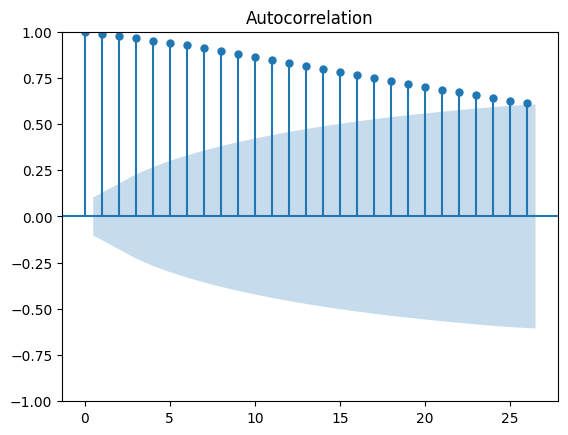

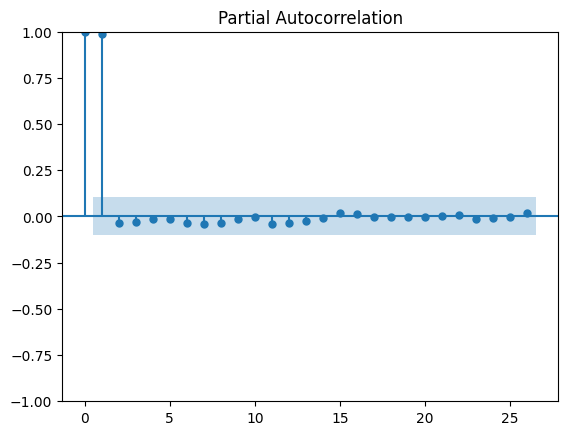

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)
pacf_original = plot_pacf(df_train)

In [18]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_train)
print(f"p-value: {adf_test[1]}")

p-value: 0.1687441536080478


<Axes: >

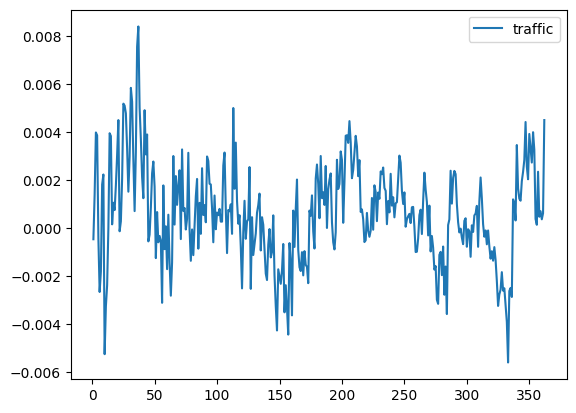

In [19]:
# Transform to stationary: differencing
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

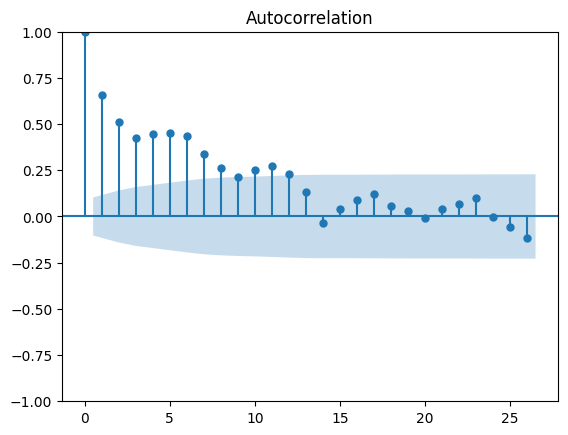

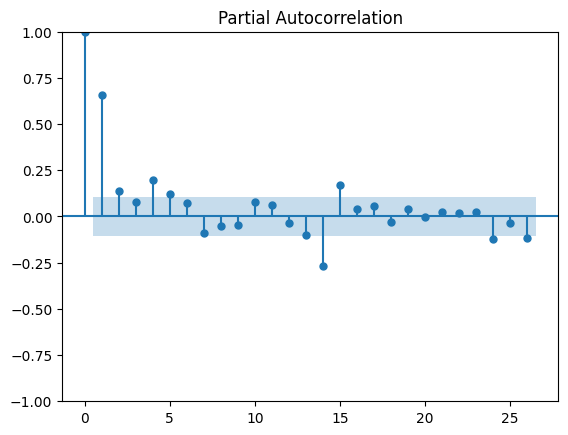

In [21]:
acf_diff = plot_acf(df_train_diff)
pacf_diff = plot_pacf(df_train_diff)

In [22]:
adf_test = adfuller(df_train_diff)
print(f"p-value: {adf_test[1]}")

p-value: 0.02041172627425859


In [23]:
# Step 2: Determine ARIMA model parameters p, q

In [24]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_train, order=(2, 1, 0))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                  363
Model:                 ARIMA(2, 1, 0)   Log Likelihood                1832.390
Date:                Sun, 16 Mar 2025   AIC                          -3658.780
Time:                        01:45:18   BIC                          -3647.105
Sample:                             0   HQIC                         -3654.139
                                - 363                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5921      0.048     12.302      0.000       0.498       0.686
ar.L2          0.1456      0.057      2.555      0.011       0.034       0.257
sigma2      2.343e-06   1.33e-07     17.648      0.0

In [25]:
# Step 4: Make time series predictions

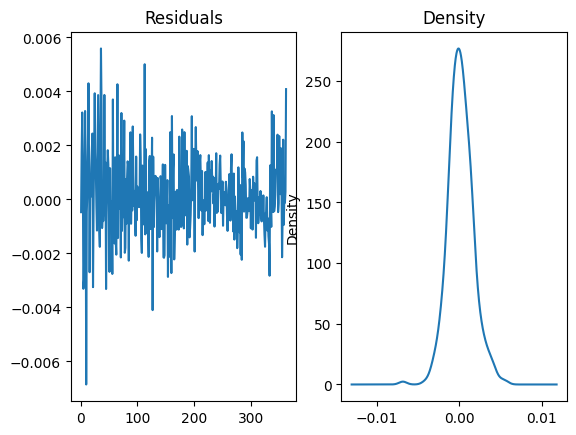

In [26]:
import matplotlib.pyplot as plt

residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1, 2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(title="Density", kind="kde", ax=ax[1])
plt.show()

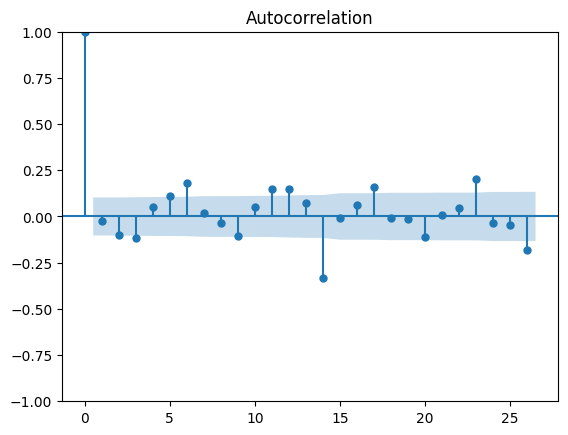

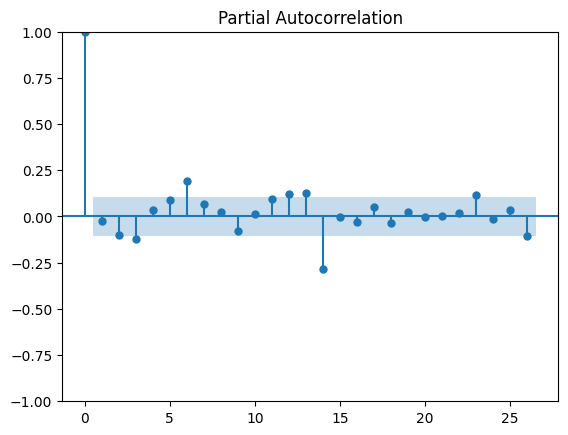

In [27]:
acf_diff = plot_acf(residuals)

pacf_diff = plot_pacf(residuals)

<Axes: >

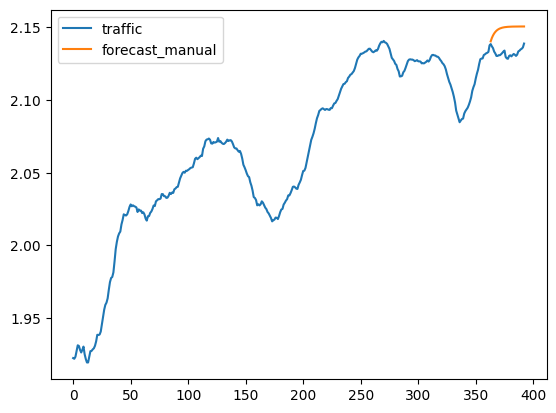

In [28]:
forecast_test = model_fit.forecast(len(df_test))

df["forecast_manual"] = [None]*len(df_train) + list(forecast_test)

df.plot()

In [29]:
# Optional: Auto-fit the ARIMA model

In [30]:
!pip3 install pmdarima --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.1 MB/s eta 0:00:00


In [32]:
import pmdarima as pm

auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True)

In [34]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  363
Model:               SARIMAX(5, 1, 0)   Log Likelihood                1845.855
Date:                Sun, 16 Mar 2025   AIC                          -3677.709
Time:                        01:51:12   BIC                          -3650.468
Sample:                             0   HQIC                         -3666.880
                                - 363                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001   8.19e-05      1.404      0.160   -4.55e-05       0.000
ar.L1          0.5216      0.050     10.417      0.000       0.423       0.620
ar.L2          0.0897      0.065      1.382      0.167      -0.037       0.217
ar.L3         -0.0457      0.063     -0.720      0.472      -0.170       0.079
ar.L4          0.1260      0.050      2.495      0.013       0.027       0.225
ar.L5          0.1239      0.047      2.656      0.008       0.032       0.215
sigma2       2.16e-06   1.39e-07     15.551      0.000    1.89e-06    2.43e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                20.78
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# Step 5: Evaluate model predictions

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

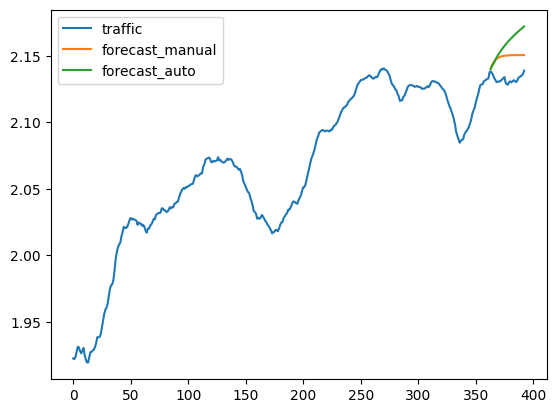

In [36]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))

df["forecast_auto"] = [None]*len(df_train) + list(forecast_test_auto)

df.plot()

In [38]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"RMSE: {rmse}")

MAE: 0.016544126111880518
MAPE: 0.0077602578675061255
RMSE: 0.017147376462097626


In [40]:
mae = mean_absolute_error(df_test, forecast_test_auto)
mape = mean_absolute_percentage_error(df_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 0.02621062306080527
mape - auto: 0.012292743457742877
rmse - auto: 0.0280037256107321


In [ ]:
# Other suggestions

# - time series cross validation
# - SARIMA
# - new info